d:\python 3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


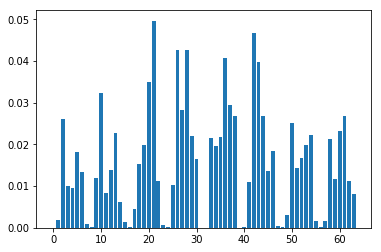

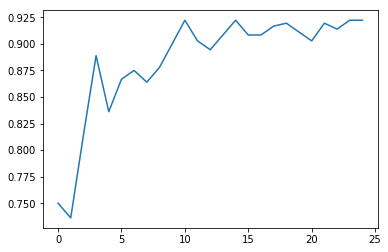

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sklearn.metrics
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

#Se carga el data set, y se divide en 80% entrenamiento 20% test
digits = load_digits()
size = int (digits.data.shape[0]*0.8)
x_train = digits.data[:size, :]
x_test = digits.data[size:, :]
y_train =digits.target[:size]
y_test = digits.target[size:]

#Se crea un clasificador con 25 arboles
classifier=RandomForestClassifier(n_estimators=25)
#Se entrena el clasificador con los datos de entrenamiento
classifier=classifier.fit(x_train,y_train)
#Se ingresan los datos de testing para su prediccion
predictions=classifier.predict(x_test)
#Se imprime la precisión que tiene el modelo
sklearn.metrics.accuracy_score(y_test, predictions)

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
#Se grafican la importancia de los atributos que contiene el data set
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

#Se grafica la importancia de cada uno de los arboles que se crearon
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)